In [36]:
import spectral.io.envi as envi
import numpy as np
#Need to convert tif to img:
#gdal_translate -of ENVI mod09q1_2015.tif mod09q1_2015.img



In [29]:
data1 = 'C:/Users/lql/Desktop/rs_petsc/ca_data/vector/test_mod'

img = envi.open(data1 +'.hdr', data1 + '.bat')
#img = img[:,:,:]
#img.shape

# rows, cols, bands

In [45]:
data1 = 'C:/Users/lql/Desktop/rs_petsc/ca_data/vector/fire2020_2'

mask = envi.open(data1 +'.hdr', data1 + '.bat')
mask = mask[:,:,:]
mask = np.asarray(mask, dtype=int)
mask.shape

(2277, 2485, 1)

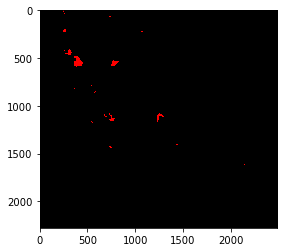

In [43]:
from spectral import *

view = imshow(classes=mask)

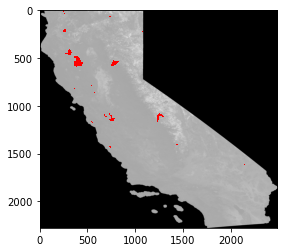

In [46]:
view = imshow(img, classes=mask)
view.set_display_mode('overlay')
view.class_alpha = 1.0

In [47]:
from collections import Counter

Counter(mask.flatten())

Counter({0: 5558345, 1: 100000})

In [6]:
import pandas as pd
l = mask.flatten()
df = pd.DataFrame(data=l, columns=['label'])

In [7]:
df.head(2)

,label
0,0
1,0


In [8]:
# loop through bands and add to df
for i in range(0, img.shape[2]):
    #print (i)
    b = img[:,:,i].flatten()
    df['b'+str(i)] = b

In [9]:
df2 = df.copy()
df2.head(2)
label = df2[['label']]
del df2['label']

In [10]:
# replace label
label

label = label.astype(int).replace(0,-1)
label = label.astype(int).replace(1,1)
label = label.astype(int).replace(2,1)
label = label.astype(int).replace(3,1)
label = label.astype(int).replace(4,1)
label = label.astype(int).replace(5,1)
label = label.astype(int).replace(6,1)

print(label.value_counts())

label
-1       7411228
 1        258058
dtype: int64


In [12]:
# set 0 to NaN
df2 = df2.replace(0,np.NaN)
df2['label'] = label
# drops NaNs
df2 = df2.dropna()
df2

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,b31,b32,b33,b34,b35,b36,b37,b38,b39,label
3045,1776.0,2577.0,456.0,1477.0,446.0,1584.0,429.0,2258.0,551.0,2088.0,...,1674.0,490.0,1693.0,1832.0,2448.0,645.0,2072.0,4335.0,4793.0,-1
3046,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,2286.0,...,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0,-1
3047,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,2286.0,...,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0,-1
3048,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,2286.0,...,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0,-1
6437,1487.0,2218.0,460.0,1402.0,457.0,1470.0,430.0,2164.0,516.0,2144.0,...,1467.0,442.0,1532.0,3077.0,3683.0,1033.0,2090.0,2345.0,3458.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663782,2397.0,2872.0,1107.0,1889.0,2337.0,2754.0,594.0,1990.0,1780.0,7900.0,...,6075.0,1012.0,1867.0,2382.0,2446.0,7775.0,7843.0,1435.0,1666.0,-1
7663783,4055.0,3959.0,2539.0,3081.0,1742.0,2238.0,716.0,1926.0,1626.0,6448.0,...,5587.0,760.0,1436.0,3130.0,2956.0,5455.0,5299.0,1607.0,1910.0,-1
7666952,951.0,2394.0,789.0,2652.0,516.0,2300.0,574.0,2181.0,584.0,2798.0,...,2323.0,540.0,2059.0,2253.0,2951.0,634.0,2262.0,413.0,1733.0,-1
7666953,893.0,2367.0,795.0,2670.0,516.0,2276.0,587.0,2198.0,599.0,2784.0,...,2347.0,564.0,2178.0,2081.0,2817.0,657.0,2293.0,423.0,1749.0,-1


In [13]:
# switch column order
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]
df2

,label,b0,b1,b2,b3,b4,b5,b6,b7,b8,...,b30,b31,b32,b33,b34,b35,b36,b37,b38,b39
3045,-1,1776.0,2577.0,456.0,1477.0,446.0,1584.0,429.0,2258.0,551.0,...,496.0,1674.0,490.0,1693.0,1832.0,2448.0,645.0,2072.0,4335.0,4793.0
3046,-1,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,...,512.0,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0
3047,-1,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,...,512.0,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0
3048,-1,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,...,512.0,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0
6437,-1,1487.0,2218.0,460.0,1402.0,457.0,1470.0,430.0,2164.0,516.0,...,439.0,1467.0,442.0,1532.0,3077.0,3683.0,1033.0,2090.0,2345.0,3458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663782,-1,2397.0,2872.0,1107.0,1889.0,2337.0,2754.0,594.0,1990.0,1780.0,...,6252.0,6075.0,1012.0,1867.0,2382.0,2446.0,7775.0,7843.0,1435.0,1666.0
7663783,-1,4055.0,3959.0,2539.0,3081.0,1742.0,2238.0,716.0,1926.0,1626.0,...,5341.0,5587.0,760.0,1436.0,3130.0,2956.0,5455.0,5299.0,1607.0,1910.0
7666952,-1,951.0,2394.0,789.0,2652.0,516.0,2300.0,574.0,2181.0,584.0,...,483.0,2323.0,540.0,2059.0,2253.0,2951.0,634.0,2262.0,413.0,1733.0
7666953,-1,893.0,2367.0,795.0,2670.0,516.0,2276.0,587.0,2198.0,599.0,...,504.0,2347.0,564.0,2178.0,2081.0,2817.0,657.0,2293.0,423.0,1749.0


In [61]:
# split data into train/test/val (shuffle = False)
from sklearn.model_selection import train_test_split

yc = cols[0]
xc = cols[1:]

xtrain, xtest, ytrain, ytest = train_test_split(df2[xc], df2[yc], test_size=0.2, random_state=1, shuffle=False)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1, shuffle=False)
    
(unique, counts) = np.unique(ytrain, return_counts=True)
print (np.asarray((unique, counts)).T)
print ('***************')
(unique, counts) = np.unique(ytest, return_counts=True)
print (np.asarray((unique, counts)).T)
print ('***************')
(unique, counts) = np.unique(yval, return_counts=True)
print (np.asarray((unique, counts)).T)

[[     -1 3780448]
 [      1  175624]]
***************
[[     -1 1300759]
 [      1   17932]]
***************
[[     -1 1259833]
 [      1   58858]]


In [62]:
# for MLSVM format

xtrain2 = xtrain.copy()
xtest2 = xtest.copy()
xval2 = xval.copy()

xtrain2['label'] = ytrain
xtest2['label'] = ytest
xval2['label'] = yval

xtrain2 = xtrain2[cols]
xtest2 = xtest2[cols]
xval2 = xval2[cols]


In [63]:
xtrain2

,label,b0,b1,b2,b3,b4,b5,b6,b7,b8,...,b30,b31,b32,b33,b34,b35,b36,b37,b38,b39
3045,-1,1776.0,2577.0,456.0,1477.0,446.0,1584.0,429.0,2258.0,551.0,...,496.0,1674.0,490.0,1693.0,1832.0,2448.0,645.0,2072.0,4335.0,4793.0
3046,-1,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,...,512.0,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0
3047,-1,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,...,512.0,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0
3048,-1,1706.0,2430.0,542.0,1638.0,538.0,1656.0,504.0,2279.0,638.0,...,512.0,1613.0,518.0,1698.0,1153.0,1807.0,1172.0,2510.0,4733.0,5163.0
6437,-1,1487.0,2218.0,460.0,1402.0,457.0,1470.0,430.0,2164.0,516.0,...,439.0,1467.0,442.0,1532.0,3077.0,3683.0,1033.0,2090.0,2345.0,3458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805602,-1,913.0,2266.0,2962.0,4290.0,379.0,2569.0,295.0,2729.0,297.0,...,389.0,2535.0,677.0,2866.0,889.0,2519.0,872.0,2239.0,2252.0,3142.0
4805603,-1,434.0,1792.0,4470.0,5562.0,490.0,2145.0,271.0,2588.0,251.0,...,358.0,2280.0,722.0,2612.0,2013.0,3319.0,564.0,1754.0,1094.0,2022.0
4805604,-1,434.0,1792.0,4470.0,5562.0,490.0,2145.0,271.0,2588.0,251.0,...,358.0,2280.0,722.0,2612.0,2013.0,3319.0,564.0,1754.0,1094.0,2022.0
4805605,-1,502.0,1943.0,1662.0,2494.0,617.0,2161.0,285.0,2169.0,219.0,...,318.0,1799.0,573.0,2057.0,1843.0,3041.0,2478.0,2926.0,799.0,1745.0


In [64]:
# export for MLSVM 

xtrain2.to_csv('mod09q1_2015_train.csv',header=None, sep=',', index=None)
xtest2.to_csv('mod09q1_2015_test.csv',header=None, sep=',', index=None)
xval2.to_csv('mod09q1_2015_val.csv',header=None, sep=',', index=None)

# Get data ready for PERMON

In [23]:
import sys
import numpy as np

sys.path.insert(0, 'C:/Users/lql/Desktop/rs_petsc/repos/petsc/lib/petsc/bin')
import PetscBinaryIO

In [29]:
def load_data(p, x):
    xf=p+x
    io = PetscBinaryIO.PetscBinaryIO()
    sparse_data= io.readBinaryFile(xf, mattype='scipy.sparse')
    return sparse_data

# Open example file (for comparison)

In [30]:
path = 'C:/Users/lql/Desktop/rs_petsc/data/'
file = 'heart_scale.bin'

x = load_data(path, file)

In [40]:
x

(<180x13 sparse matrix of type '<class 'numpy.float64'>'
 	with 2248 stored elements in Compressed Sparse Row format>,
 Vec([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
       1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
       1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
       1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
      -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
      -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
       1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,
       1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
      -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       1.,  1., -1.,  1., -1.,  1., -1., -1.,

In [33]:
type(x[1])

PetscBinaryIO.Vec

# Prepare RS data

In [65]:
# may need to normalize data here

xtrain3 = xtrain.values
xtest3 = xtest.values
xval3 = xval.values

ytrain3 = ytrain.values
ytest3 = ytest.values
yval3 = yval.values

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(xtrain3)

xtrain4 = scaler.transform(xtrain3)
xtest4 = scaler.transform(xtest3)
xval4 = scaler.transform(xval3)

# Convert to PERMON format

In [88]:
from scipy import sparse

sXtrain = sparse.csr_matrix(xtrain4)
sXtest = sparse.csr_matrix(xtest4)
sXval = sparse.csr_matrix(xval4)

In [89]:
sXtrain

<3956072x40 sparse matrix of type '<class 'numpy.float64'>'
	with 158239813 stored elements in Compressed Sparse Row format>

In [90]:
sYtrain = ytrain3.view(PetscBinaryIO.Vec)
sYtest = ytest3.view(PetscBinaryIO.Vec)
sYval = yval3.view(PetscBinaryIO.Vec)

type(sYtrain)
type(sYtest)
type(sYval)

PetscBinaryIO.Vec

In [92]:
permon_train = (sXtrain, sYtrain)
permon_test = (sXtest, sYtest)
permon_val = (sXval, sYval)

permon_train

(<3956072x40 sparse matrix of type '<class 'numpy.float64'>'
 	with 158239813 stored elements in Compressed Sparse Row format>,
 Vec([-1, -1, -1, ..., -1, -1, -1]))

In [94]:
io = PetscBinaryIO.PetscBinaryIO()
io.writeBinaryFile('mod09q1_2015_train.bin', permon_train)
#io = PetscBinaryIO.PetscBinaryIO()
io.writeBinaryFile('mod09q1_2015_test.bin', permon_test)
#io = PetscBinaryIO.PetscBinaryIO()
io.writeBinaryFile('mod09q1_2015_val.bin', permon_val)

In [97]:
# Sklearn linear SVM

xtrain4

array([[0.11652174, 0.1572173 , 0.03453416, ..., 0.13490683, 0.27546584,
        0.30391304],
       [0.11217391, 0.14798769, 0.03987578, ..., 0.1621118 , 0.30018634,
        0.32689441],
       [0.11217391, 0.14798769, 0.03987578, ..., 0.1621118 , 0.30018634,
        0.32689441],
       ...,
       [0.0331677 , 0.10792993, 0.28385093, ..., 0.11515528, 0.07416149,
        0.13180124],
       [0.0373913 , 0.11741069, 0.10944099, ..., 0.18795031, 0.05583851,
        0.11459627],
       [0.03335404, 0.11376907, 0.01248447, ..., 0.11341615, 0.21360248,
        0.24732919]])

In [98]:
ytrain3

array([-1, -1, -1, ..., -1, -1, -1])

In [99]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf


LinearSVC(random_state=0, tol=1e-05)

In [100]:
clf.fit(xtrain4, ytrain3)

LinearSVC(random_state=0, tol=1e-05)

In [104]:
yp = clf.predict(xtest4)

In [105]:
from sklearn.metrics import classification_report

print(classification_report(ytest3, yp))

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99   1300759
           1       0.59      0.76      0.66     17932

    accuracy                           0.99   1318691
   macro avg       0.79      0.87      0.83   1318691
weighted avg       0.99      0.99      0.99   1318691



In [106]:
yp = clf.predict(xval4)
print(classification_report(yval3, yp))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99   1259833
           1       0.78      0.79      0.78     58858

    accuracy                           0.98   1318691
   macro avg       0.88      0.89      0.89   1318691
weighted avg       0.98      0.98      0.98   1318691

